In [4]:
import requests
import os
import pandas as pd
import geopandas as gpd 


In [2]:
# scrape the data from BLS.GOV
# Note, it seems to slow down as I run it, may be a rate limit
base_url = "https://www.bls.gov/lau/"
year_range = range(1990, 2023)
for yeari in year_range:
    # turn year into string
    year = str(yeari)
    url = base_url + "laucnty" + year[2:4] + ".xlsx"
    print(url)

    # Fetch the content using requests and a modified user-agent
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"
    }
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Read the content into a pandas DataFrame
    with open("temp_file.xlsx", "wb") as f:
        f.write(response.content)
    df = pd.read_excel("temp_file.xlsx")

    ### UNEMPLOYMENT RATE
    # extract data, rename columns, and remove first 5 rows
    df_extracted_unemp_rate = df[['Unnamed: 2','Unnamed: 3', 'Unnamed: 9']][5:].rename(columns={'Unnamed: 2':'GeoFIPS', 'Unnamed: 3':'GeoName', 'Unnamed: 9':year})
    # reorder columns
    df_extracted_unemp_rate = df_extracted_unemp_rate[['GeoFIPS', 'GeoName', year]]
    # if first year in range
    if yeari == year_range[0]:
        df_all_unemp_rate = df_extracted_unemp_rate
    else:
        df_all_unemp_rate = pd.merge(df_all_unemp_rate, df_extracted_unemp_rate, on=['GeoFIPS', 'GeoName'], how='outer')
        # drop nan rows
        df_all_unemp_rate = df_all_unemp_rate.dropna()

    ### WORKFORCE SIZE
    # extract data, rename columns, and remove first 5 rows
    df_extracted_workforce_size = df[['Unnamed: 2','Unnamed: 3', 'Unnamed: 6']][5:].rename(columns={'Unnamed: 2':'GeoFIPS', 'Unnamed: 3':'GeoName', 'Unnamed: 6':year})
    # reorder columns
    df_extracted_workforce_size = df_extracted_workforce_size[['GeoFIPS', 'GeoName', year]]
    # if first year in range
    if yeari == year_range[0]:
        df_all_workforce_size = df_extracted_workforce_size
    else:
        df_all_workforce_size = pd.merge(df_all_workforce_size, df_extracted_workforce_size, on=['GeoFIPS', 'GeoName'], how='outer')
        # drop nan rows
        df_all_workforce_size = df_all_workforce_size.dropna()
        
    
df_all_workforce_size

https://www.bls.gov/lau/laucnty90.xlsx
https://www.bls.gov/lau/laucnty91.xlsx
https://www.bls.gov/lau/laucnty92.xlsx
https://www.bls.gov/lau/laucnty93.xlsx
https://www.bls.gov/lau/laucnty94.xlsx
https://www.bls.gov/lau/laucnty95.xlsx
https://www.bls.gov/lau/laucnty96.xlsx
https://www.bls.gov/lau/laucnty97.xlsx
https://www.bls.gov/lau/laucnty98.xlsx
https://www.bls.gov/lau/laucnty99.xlsx
https://www.bls.gov/lau/laucnty00.xlsx
https://www.bls.gov/lau/laucnty01.xlsx
https://www.bls.gov/lau/laucnty02.xlsx
https://www.bls.gov/lau/laucnty03.xlsx
https://www.bls.gov/lau/laucnty04.xlsx
https://www.bls.gov/lau/laucnty05.xlsx
https://www.bls.gov/lau/laucnty06.xlsx
https://www.bls.gov/lau/laucnty07.xlsx
https://www.bls.gov/lau/laucnty08.xlsx
https://www.bls.gov/lau/laucnty09.xlsx
https://www.bls.gov/lau/laucnty10.xlsx
https://www.bls.gov/lau/laucnty11.xlsx
https://www.bls.gov/lau/laucnty12.xlsx
https://www.bls.gov/lau/laucnty13.xlsx
https://www.bls.gov/lau/laucnty14.xlsx
https://www.bls.gov/lau/l

,GeoFIPS,GeoName,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,001,"Autauga County, AL",16936,16958,17629,18170,18885,19632,20263,21087,...,25783,25639,25541,25710,26269,26471,26696,26425,26545,26789
1,003,"Baldwin County, AL",46896,49521,52129,54891,58092,60795,63985,67122,...,85206,86546,87493,89778,93152,96235,98965,98979,99953,102849
2,005,"Barbour County, AL",11510,11649,11592,11953,12144,12346,12515,12473,...,9096,8859,8590,8334,8415,8505,8641,8684,8280,8241
3,007,"Bibb County, AL",7449,7529,7976,7700,7748,7987,7888,8032,...,8699,8573,8552,8539,8648,8697,8777,8717,8641,8726
4,009,"Blount County, AL",19196,19166,19522,19862,20334,20985,21685,22676,...,24860,24571,24416,24380,25009,25333,25592,25136,25377,25796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,145,"Vega Baja Municipio, PR",16876,17476,17593,17431,17994,18558,19157,20133,...,14601,14157,13820,13733,13414,13159,13174,N.A.,14172,14232
3208,147,"Vieques Municipio, PR",2477,2588,2784,2658,2503,2512,2566,2675,...,3080,3152,3194,3260,3027,2726,2551,N.A.,2804,2742
3209,149,"Villalba Municipio, PR",5870,5986,6294,6633,6115,6042,6203,6207,...,8184,7920,7802,7815,7557,7335,7494,N.A.,7697,7790
3210,151,"Yabucoa Municipio, PR",10532,10995,11105,11136,11459,11825,12231,12897,...,10169,9642,9198,9081,9000,8791,8841,N.A.,9156,9278


In [3]:
# save in data/processed
# make sure GeoFIPS is a string
df_all_unemp_rate['GeoFIPS'] = df_all_unemp_rate['GeoFIPS'].astype(str)
df_all_workforce_size['GeoFIPS'] = df_all_workforce_size['GeoFIPS'].astype(str)
df_all_unemp_rate.to_csv('../../data/raw/unemployment_rate_wide_withNA.csv', index=False)
df_all_workforce_size.to_csv('../../data/raw/workforce_size_wide_withNA.csv', index=False)

# save in data/raw, but first remove rows that have non numerical values after the first 2 columns
df_all_unemp_rate_clean = df_all_unemp_rate[df_all_unemp_rate.iloc[:,2:].apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all(), axis=1)]
df_all_unemp_rate_clean.to_csv('../../data/processed/unemployment_rate_wide.csv', index=False)
df_all_workforce_size_clean = df_all_workforce_size[df_all_workforce_size.iloc[:,2:].apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all(), axis=1)]
df_all_workforce_size_clean.to_csv('../../data/processed/workforce_size_wide.csv', index=False)

In [4]:
# remove temp file
os.remove("temp_file.xlsx")

KeyError: '2019'

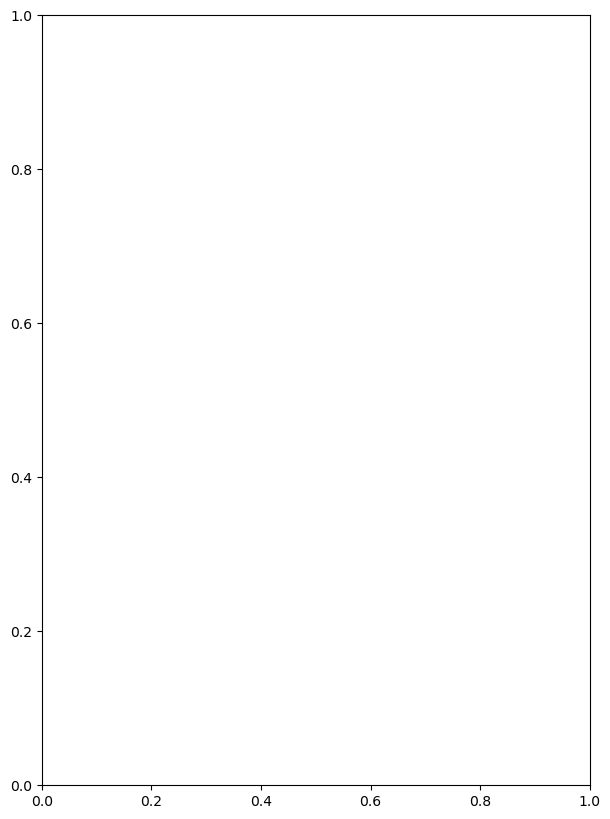

In [20]:
# plot on a map using FIPS codes to make sure it looks right
# load csv
# df_all_unemp_rate_clean = pd.read_csv('../../data/processed/unemployment_rate_wide.csv')

# read in shapefile
# Load the U.S. counties shapefile (this includes FIPS codes)
url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_20m.zip"
counties = gpd.read_file(url)

# merge with unemployment data
# counties = counties.merge(df_all_unemp_rate_clean, left_on='COUNTYFP', right_on='GeoFIPS', how='left')

# plot
counties.plot(column='2019', legend=True, figsize=(15, 10))


In [15]:
# check type of COUNTYFP
counties['COUNTYFP'].dtype
df_all_unemp_rate_clean['GeoFIPS'] = df_all_unemp_rate_clean['GeoFIPS'].astype(str)
df_all_unemp_rate_clean['GeoFIPS'].dtype

dtype('O')

In [21]:
counties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,239,00350547,0500000US13239,13239,Quitman,Quitman County,GA,Georgia,06,391703076,24158295,"POLYGON ((-85.14183 31.83926, -85.11403 31.893..."
1,18,111,00450376,0500000US18111,18111,Newton,Newton County,IN,Indiana,06,1040539827,4349506,"POLYGON ((-87.52665 41.16609, -87.39380 41.162..."
2,19,053,00465215,0500000US19053,19053,Decatur,Decatur County,IA,Iowa,06,1377569408,4138626,"POLYGON ((-94.01480 40.89703, -93.55654 40.898..."
3,24,013,01696228,0500000US24013,24013,Carroll,Carroll County,MD,Maryland,06,1159355859,13112464,"POLYGON ((-77.21702 39.72022, -76.99932 39.720..."
4,29,155,00758532,0500000US29155,29155,Pemiscot,Pemiscot County,MO,Missouri,06,1275841039,53915406,"POLYGON ((-89.96131 36.38880, -89.75215 36.386..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,41,063,01155135,0500000US41063,41063,Wallowa,Wallowa County,OR,Oregon,06,8147835333,14191752,"POLYGON ((-117.97766 46.00017, -117.71785 45.9..."
3217,13,163,00345714,0500000US13163,13163,Jefferson,Jefferson County,GA,Georgia,06,1363771357,8059597,"POLYGON ((-82.66192 33.12633, -82.57882 33.119..."
3218,02,100,01419970,0500000US02100,02100,Haines,Haines Borough,AK,Alaska,04,6069358955,1041214321,"POLYGON ((-136.46681 59.28425, -136.47433 59.4..."
3219,05,117,00069176,0500000US05117,05117,Prairie,Prairie County,AR,Arkansas,06,1677069877,72638193,"POLYGON ((-91.80251 35.03070, -91.70112 35.062..."
